In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Define the affine transformation matrices and translation vectors
A1 = np.array([[0, 0], [0, 0.16]])
A2 = np.array([[0.85, 0.04], [-0.04, 0.85]])
A3 = np.array([[0.2, -0.26], [0.23, 0.22]])
A4 = np.array([[-0.15, 0.28], [0.26, 0.24]])
t1 = np.array([[0], [0]])
t2 = np.array([[0], [1.6]])
t3 = np.array([[0], [1.6]])
t4 = np.array([[0], [0.44]])

In [46]:
# Define the probabilities
p1, p2, p3, p4 = 0.01, 0.85, 0.07, 0.07

In [47]:
# Allocate arrays for x and y coordinates
iterations = 100000
x = np.zeros(iterations)
y = np.zeros(iterations)

In [48]:
# Initial point
v = np.array([[0], [0]])

# Iterate and apply transformations
for n in range(1, iterations):
    k = np.random.rand()
    if k < p1:
        v = A1.dot(v) + t1
    elif k < p1 + p2:
        v = A2.dot(v) + t2
    elif k < p1 + p2 + p3:
        v = A3.dot(v) + t3
    else:
        v = A4.dot(v) + t4
    x[n], y[n] = v.flatten()

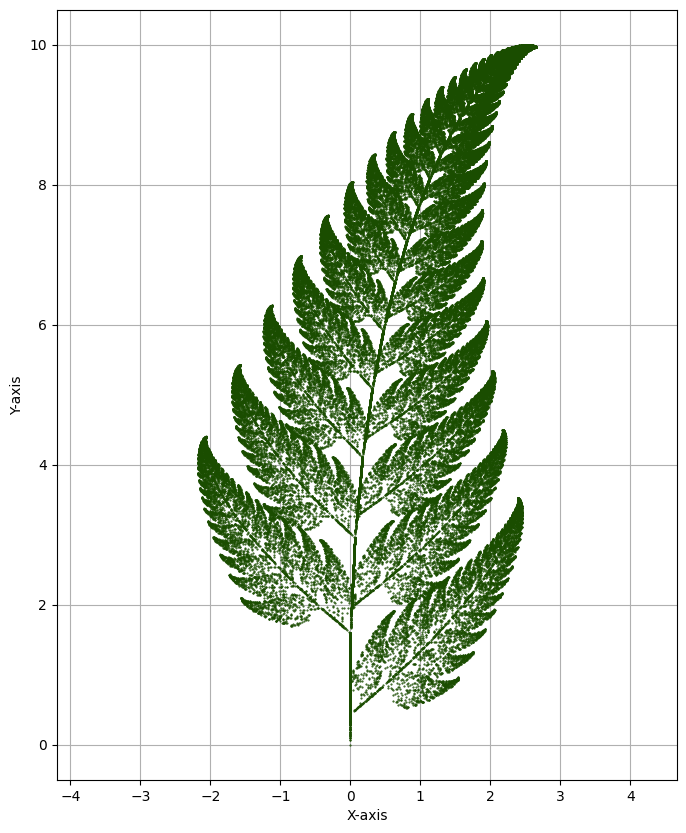

In [49]:
# Plot the points
plt.figure(figsize=(8, 10))
plt.plot(x, y, '.', color=[0.1, 0.3, 0], markersize=1)
plt.axis('equal')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

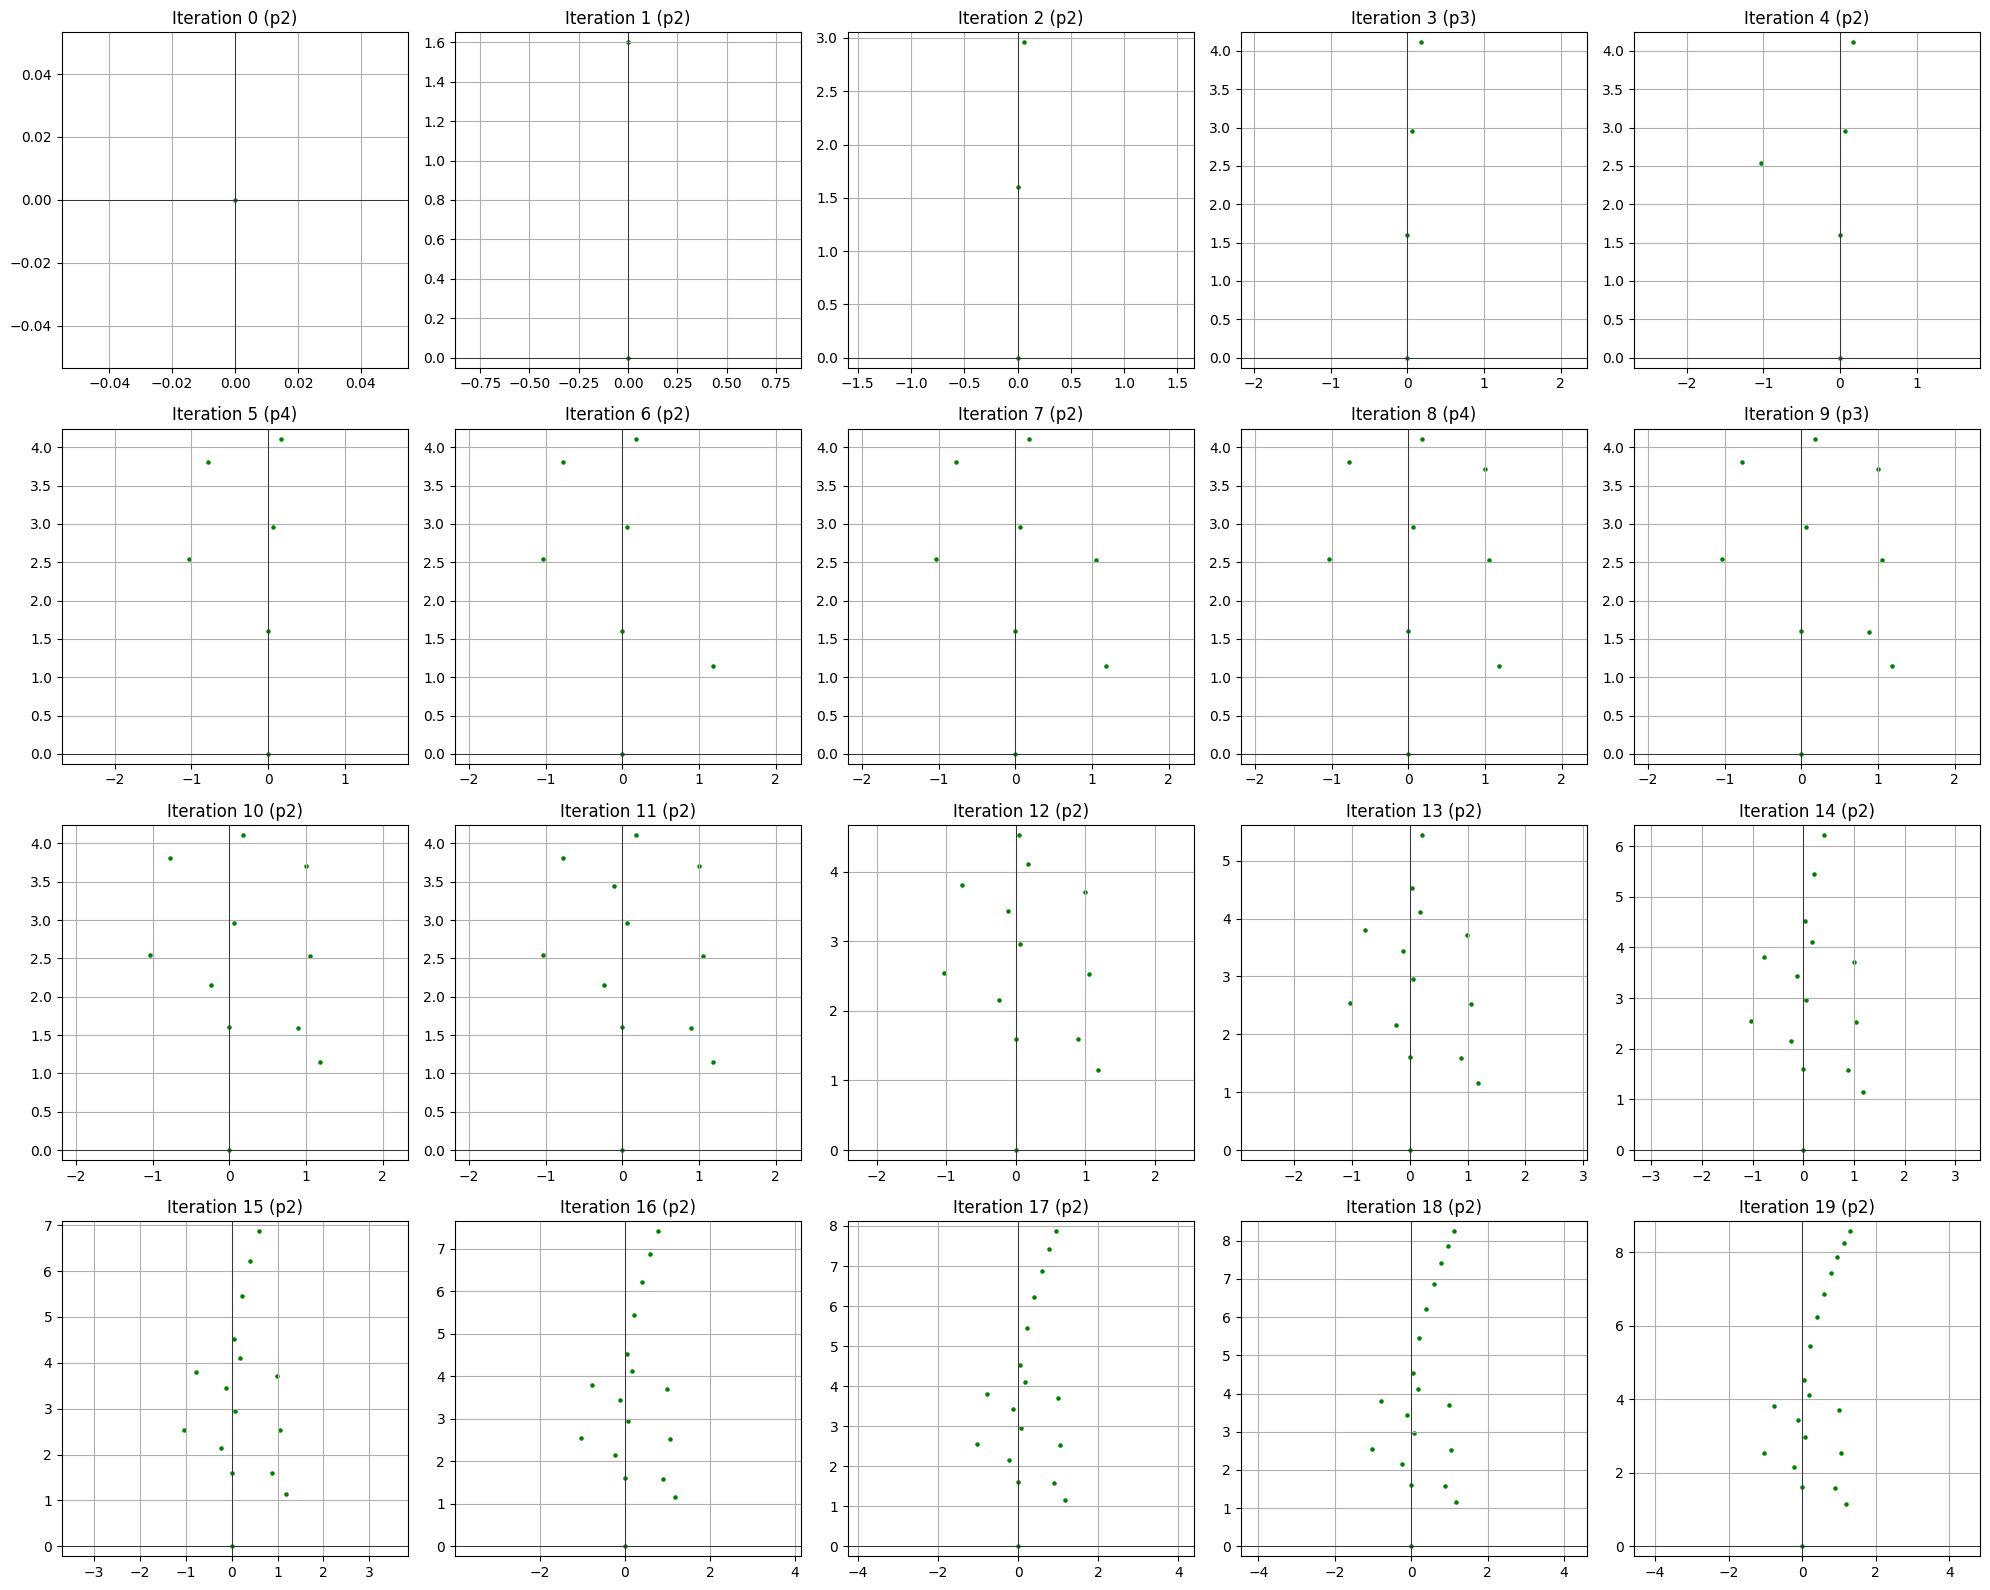

In [50]:
# Initialize the starting point
v = np.array([[0], [0]])  # Starting point

# Initialize arrays to store points and probabilities for each iteration
points = [v.flatten()]
probabilities_used = []

# Generate points for 20 iterations
for n in range(1, 21):
    k = np.random.rand()
    if k < p1:
        v = A1.dot(v) + t1
        probabilities_used.append('p1')
    elif k < p1 + p2:
        v = A2.dot(v) + t2
        probabilities_used.append('p2')
    elif k < p1 + p2 + p3:
        v = A3.dot(v) + t3
        probabilities_used.append('p3')
    else:
        v = A4.dot(v) + t4
        probabilities_used.append('p4')
    points.append(v.flatten())

# Function to plot points up to a given iteration with consistent axes, grid, and probability label
def plot_points_with_probability(axes, iteration, probability):
    x_vals = [point[0] for point in points[:iteration + 1]]
    y_vals = [point[1] for point in points[:iteration + 1]]
    axes.scatter(x_vals, y_vals, color='green', s=5)
    axes.set_title(f'Iteration {iteration} ({probability})')
    axes.set_xlim(-2.5, 2.5)
    axes.set_ylim(-0.5, 9.5)
    axes.grid(True)
    axes.axis('equal')
    axes.axhline(0, color='black', linewidth=0.5)
    axes.axvline(0, color='black', linewidth=0.5)

# Generating 20 images in a grid with consistent axes and probability labels
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for i in range(20):
    plot_points_with_probability(axes[i // 5, i % 5], i, probabilities_used[i])

plt.tight_layout()
plt.show()
